<a href="https://colab.research.google.com/github/prakritishaurya/DeepLearningProjects/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Traffic Sign Classification using CNN on Tensorflow 2.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [ ]:
# load the data and store them in train, test and valid variables respectively
train = pickle.load(open('train.p','rb'))
test = pickle.load(open('test.p','rb'))
valid = pickle.load(open('valid.p','rb'))

In [ ]:
# segregate the data into features and labels
x_train, y_train= train['features'], train['labels']
x_validation, y_validation= valid['features'], valid['labels']
x_test, y_test= test['features'], test['labels']

In [ ]:
# print the shape of data
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
# print the shape of data
print(y_train.shape)
print(y_validation.shape)
print(y_test.shape)

(34799,)
(4410,)
(12630,)


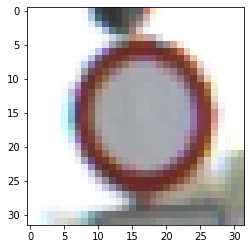

In [ ]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])

In [ ]:
print(y_train[i])

15


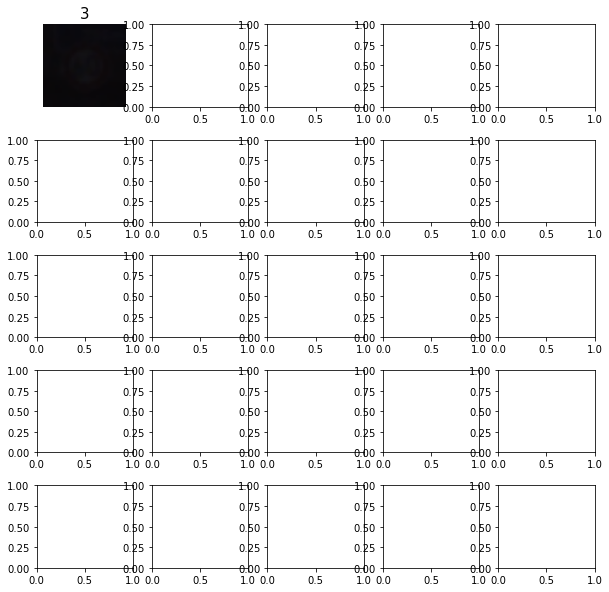

In [ ]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize=(10,10))

axes = axes.ravel()

n_training = len(x_train)



for i in np.arange(0, W_grid, L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis('off')
    plt.subplots_adjust(hspace=0.4)


In [ ]:
# create evenly spaces variables
for i in np.arange(0, W_grid * L_grid):
     # Select a random number
    index=np.random.randint(0, n_training)
     # read and display an image with the selected
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize= 15)
    axes[i].axis('off')
    plt.subplots_adjust(hspace=0.4) 

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

x_train_grey = np.sum(x_train/3, axis=3, keepdims=True)
x_test_grey = np.sum(x_test/3, axis=3, keepdims=True)
x_valid_grey = np.sum(x_validation/3, axis=3, keepdims=True)

print(x_train_grey.shape)
print(x_test_grey.shape)
print(x_valid_grey.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
# Normalizing the data
x_train_grey_norm= (x_train_grey-255)/255
x_test_grey_norm= (x_test_grey-255)/255
x_valid_grey_norm= (x_valid_grey-255)/255

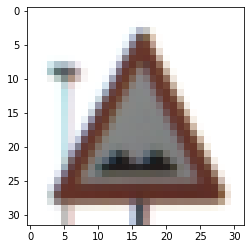

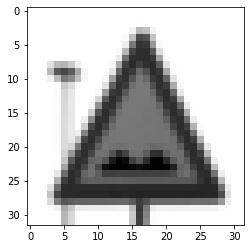

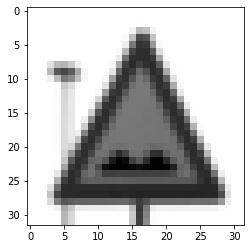

In [ ]:
#visualizing the normalized data
i = random.randint(1, len(x_train_grey))
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_grey[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train_grey_norm[i].squeeze(), cmap='gray')

In [ ]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(16, (5,5), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_grey_norm, y_train, batch_size=500, epochs=15, verbose=1, validation_data=(x_valid_grey_norm, y_validation))

Epoch 1/15
70/70 [==============================] - 24s 338ms/step - loss: 3.4504 - accuracy: 0.0935 - val_loss: 3.3309 - val_accuracy: 0.1234
Epoch 2/15
70/70 [==============================] - 22s 314ms/step - loss: 2.7248 - accuracy: 0.2659 - val_loss: 2.3662 - val_accuracy: 0.3528
Epoch 3/15
70/70 [==============================] - 23s 325ms/step - loss: 1.8395 - accuracy: 0.4786 - val_loss: 1.6564 - val_accuracy: 0.5569
Epoch 4/15
70/70 [==============================] - 23s 327ms/step - loss: 1.2759 - accuracy: 0.6257 - val_loss: 1.1716 - val_accuracy: 0.6762
Epoch 5/15
70/70 [==============================] - 22s 314ms/step - loss: 0.9366 - accuracy: 0.7324 - val_loss: 0.9000 - val_accuracy: 0.7560
Epoch 6/15
70/70 [==============================] - 22s 312ms/step - loss: 0.7351 - accuracy: 0.7936 - val_loss: 0.7607 - val_accuracy: 0.7805
Epoch 7/15
70/70 [==============================] - 22s 316ms/step - loss: 0.6178 - accuracy: 0.8266 - val_loss: 0.6329 - val_accuracy: 0.8254

In [ ]:
score=model.evaluate(x_test_grey_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 5s 13ms/step - loss: 0.6000 - accuracy: 0.8737
Test Accuracy: 0.8737133741378784


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

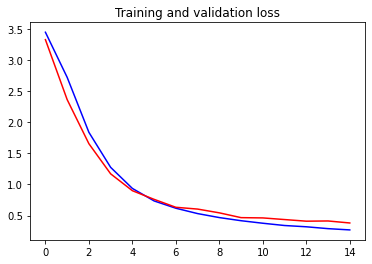

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

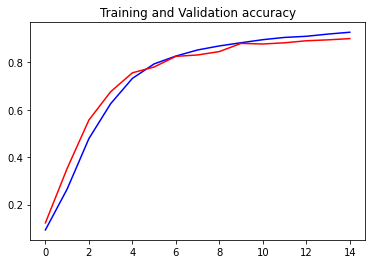

In [ ]:
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
predicted_classes = model.predict_classes(x_test_grey_norm)
y_true = y_test
print(classification_report(y_test,predicted_classes))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.55      0.37      0.44        60
           1       0.82      0.91      0.86       720
           2       0.88      0.94      0.91       750
           3       0.83      0.76      0.80       450
           4       0.89      0.87      0.88       660
           5       0.73      0.84      0.78       630
           6       0.93      0.84      0.88       150
           7       0.96      0.75      0.84       450
           8       0.89      0.87      0.88       450
           9       0.94      0.93      0.94       480
          10       0.92      0.97      0.94       660
          11     

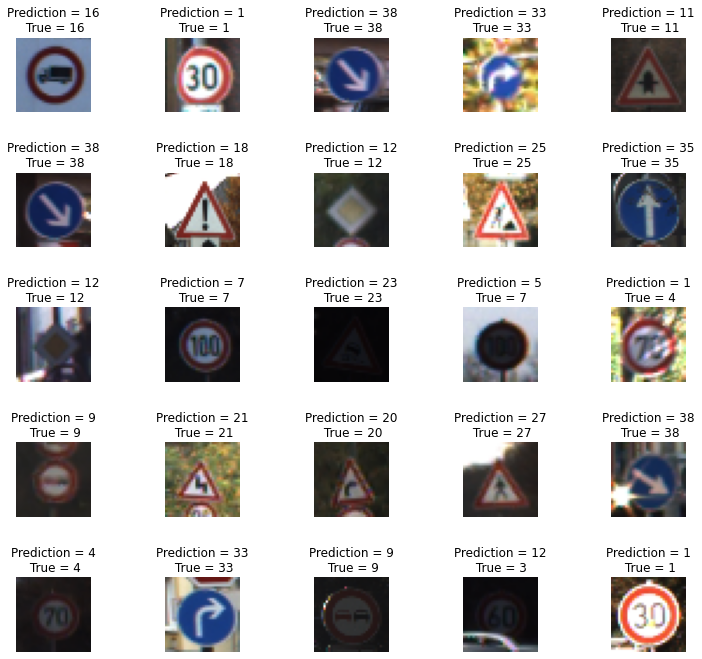

In [ ]:
L=5
W=5
fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)